In [1]:
#%matplotlib qt
%load_ext autoreload
%autoreload 2
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import h5py
from scipy import signal
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
file_name =  'mouse_1_csd_lfp_3sec.h5'
h5=h5py.File(file_name,'r')
print( h5.keys() )
csd_on_flash = h5['csd_on_flash'][...]
csd_off_flash = h5['csd_off_flash'][...]
z = h5['zdepth'][...]
time = h5['time'][...]

KeysView(<HDF5 file "mouse_1_csd_lfp_3sec.h5" (mode r)>)


In [3]:
fs=2500 # sampling rate
x=time
N=len(x)
fmax=fs//2

psd = np.zeros((len(z),int(N/2+1)))

f_log = np.logspace(-1,2,100)
psd_on = np.zeros((len(z),N//2+1))
psd_off = np.zeros((len(z),N//2+1))

for ich,data_ch in enumerate(csd_on_flash):
    f, Pxx_den = signal.periodogram(data_ch, fs)
    psd_on[ich,:]=Pxx_den
#    psd_on_log[ich,:] =np.interp(f_log, f, Pxx_den)
    
psd_off_log = np.zeros((len(z),len(f_log)))
    
for ich,data_ch in enumerate(csd_off_flash):
    f, Pxx_den = signal.periodogram(data_ch, fs)
    psd_off[ich,:]=Pxx_den
#    psd_off_log[ich,:] =np.interp(f_log, f, Pxx_den)

In [5]:
fs = 2500.0
dt = 1.0 / fs

x = np.arange(0.0,3, dt)
factor =1
#y1=2*np.exp(2)/(2*0.5)**2*x**2*(np.exp(-x/0.5))
#y08=2*np.exp(2)/(2*0.4)**2*x**2*(np.exp(-x/0.4))
#y1p2=2*np.exp(2)/(2*0.6)**2*x**2*(np.exp(-x/0.6))

y1=2*(np.exp(-x/20.0))
y08=2*(np.exp(-x/0.8))
y1p2=2*(np.exp(-x/1.2))



fm, Py1_den = signal.periodogram(y1, fs)
fm, Py08_den = signal.periodogram(y08, fs)
fm, Py1p2_den = signal.periodogram(y1p2, fs)

Py1_den_log_scale = factor*np.interp(f_log, fm, Py1_den)
Py08_den_log_scale = factor*np.interp(f_log, fm, Py08_den)
Py1p2_den_log_scale = factor*np.interp(f_log, fm, Py1p2_den)



fig5,ax5 = plt.subplots(2,1);

ax5[0].plot(x,y1,'-')
ax5[0].plot(x,y08,'-')
ax5[0].plot(x,y1p2,'-')


ax5[1].semilogy(fm,Py1_den,'.-')
ax5[1].semilogy(fm,Py08_den,'.-')
ax5[1].semilogy(fm,Py1p2_den,'.-')

ax5[1].set_xscale('log')
ax5[1].set_xlim([10**-1,10**2])
ax5[1].set_ylim([10**-9,10**1])


NameError: name 'f_log' is not defined

In [4]:
from scipy import stats

psd_off_mean = np.mean(psd_off,axis=0)
psd_on_mean = np.mean(psd_on,axis=0)
sem_on = stats.sem(psd_on,axis=0)
sem_off = stats.sem(psd_off,axis=0)

psd_on_mean_ls =np.interp(f_log, f, psd_on_mean)
psd_off_mean_ls =np.interp(f_log, f, psd_off_mean)

sem_on_ls =np.interp(f_log, f, sem_on)
sem_off_ls =np.interp(f_log, f, sem_off)



NameError: name 'psd_off' is not defined

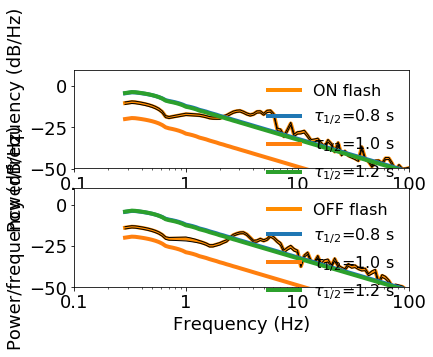

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
fig3,ax3 = plt.subplots(2,1);

factor=3 # used in the modeled trace because it is 3 times longer

ax3[0].plot(f_log[15:],10*np.log10(psd_on_mean_ls[15:]),color="darkorange",lw=4,label="ON flash")
ax3[0].plot(f_log[15:],10*np.log10(psd_on_mean_ls[15:]+sem_on_ls[15:]),color="k",lw=1)
ax3[0].plot(f_log[15:],10*np.log10(psd_on_mean_ls[15:]-sem_on_ls[15:]),color="k",lw=1)

ax3[0].set_xscale('log')
ax3[0].set_xlim([10**-1,10**2])
ax3[0].set_ylim([-49.9,10])
ax3[0].set_xticklabels([0,0.1,1,10,100])

ax3[0].plot(f_log[15:],10*np.log10(Py08_den_log_scale[15:]),lw=4,label=r"$\tau_{1/2}$=0.8 s")
ax3[0].plot(f_log[15:],10*np.log10(Py1_den_log_scale[15:]),lw=4,label=r"$\tau_{1/2}$=1.0 s")
ax3[0].plot(f_log[15:],10*np.log10(Py1p2_den_log_scale[15:]),lw=4,label=r"$\tau_{1/2}$=1.2 s")
ax3[0].legend(frameon=False,loc='upper right',prop={'size':16})

ax3[0].set_ylabel("Power/frequency (dB/Hz)")



ax3[1].plot(f_log[15:],10*np.log10(psd_off_mean_ls[15:]),color="darkorange",lw=4,label="OFF flash")
ax3[1].plot(f_log[15:],10*np.log10(psd_off_mean_ls[15:]+sem_off_ls[15:]),color="k",lw=1)
ax3[1].plot(f_log[15:],10*np.log10(psd_off_mean_ls[15:]-sem_off_ls[15:]),color="k",lw=1)
ax3[1].set_xscale('log')
ax3[1].set_xlim([10**-1,10**2])
ax3[1].set_ylim([-49.9,10])

ax3[1].plot(f_log[15:],10*np.log10(Py08_den_log_scale[15:]),lw=4,label=r"$\tau_{1/2}$=0.8 s")
ax3[1].plot(f_log[15:],10*np.log10(Py1_den_log_scale[15:]),lw=4,label=r"$\tau_{1/2}$=1.0 s")
ax3[1].plot(f_log[15:],10*np.log10(Py1p2_den_log_scale[15:]),lw=4,label=r"$\tau_{1/2}$=1.2 s")

ax3[1].set_xticklabels([0,0.1,1,10,100])
ax3[1].set_xlabel("Frequency (Hz)")
ax3[1].set_ylabel("Power/frequency (dB/Hz)")

ax3[1].legend(frameon=False,loc='upper right',prop={'size':16})
plt.show()